In [1]:
# Input gold file and my labels file
gold_labels_file = "dev_ref.txt"
my_labels_file = "my_dev_labels_best.txt"

In [2]:
# Hardcoded list of classes identical to the one used for training
hardcoded_labels = ["Agriculture, food and drink",
                    "Art and architecture",
                    "Engineering and technology",
                    "Geography and places",
                    "History",
                    "Language and literature",
                    "Mathematics",
                    "Media and drama",
                    "Miscellaneous",
                    "Music",
                    "Natural sciences",
                    "Philosophy and religion",
                    "Social sciences and society",
                    "Sports and recreation",
                    "Video games",
                    "Warfare"]
hardcoded_labels_dict = {l.lower():i for i, l in enumerate(hardcoded_labels)}

In [11]:
# Generate error matrix and calculate accuracy as well

correct_count = 0
total_count = 0
error_matrix = [[0] * 16 for i in range(16)]

with open(gold_labels_file, "r") as goldfile, open(my_labels_file, "r") as myfile:
    for gold_label, my_label in zip(goldfile, myfile):
        gold_label = gold_label.strip().lower()
        my_label = my_label.strip().lower()
    
        total_count += 1
        if gold_label == my_label:
            correct_count += 1
        else:
            error_matrix[hardcoded_labels_dict[gold_label]][hardcoded_labels_dict[my_label]] += 1

print("Accuracy: {}".format(correct_count / total_count))
print("Error Matrix:")
for row in error_matrix:
    print(row)
        

Accuracy: 0.8351477449455676
Error Matrix:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0]
[1, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 2, 0, 0, 0, 0, 0, 0, 1, 5, 0, 2, 1, 0, 4]
[0, 2, 0, 5, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 11]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0]
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 6, 0, 0, 2, 0, 2, 0, 3, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0]


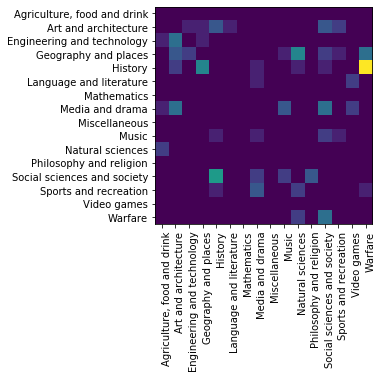

In [9]:
# Generate error plot

import numpy as np
import matplotlib.pyplot as plt

E = np.array(error_matrix)
fig, ax = plt.subplots()
im = ax.imshow(E)

ax.set_xticks(np.arange(len(hardcoded_labels)))
ax.set_yticks(np.arange(len(hardcoded_labels)))
ax.set_xticklabels(hardcoded_labels)
ax.set_yticklabels(hardcoded_labels)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
plt.show()